# PHYS 434 - Lab 3: Asking a statistical question

## Thomas K. Waters

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.integrate as integrate
import pandas as pd

## Problem 1

In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

### A) So our goal is to identify bad data and throw it out.

1. Start by exploring the data you have created with appropriate plots
2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
3. Restate your question in math. Be very clear.
4. Apply your statistical test and construct a truth table.


#### 1. Exploring the Data

Text(0.5, 1.0, 'Semi-log Temp Distribution')

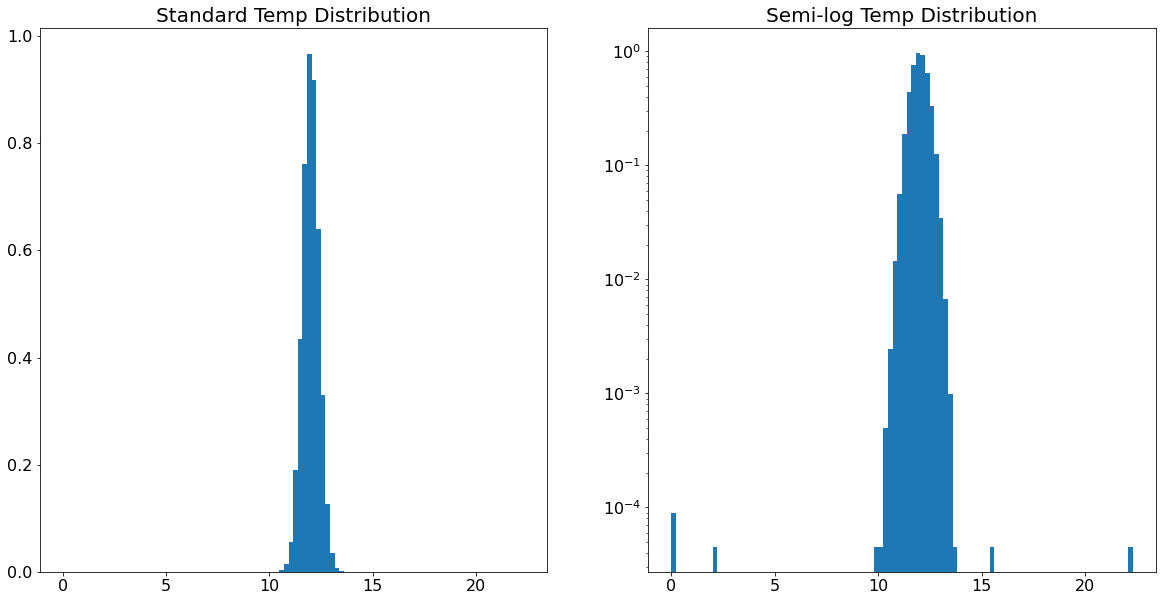

In [3]:
data = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])


fig, ax = plt.subplots(1, 2, figsize = (20,10))

ax[0].hist(data,100, density=True)
ax[0].tick_params(labelsize = 16)
ax[0].set_title('Standard Temp Distribution', size = 20)

ax[1].hist(data,100, density=True)
ax[1].tick_params(labelsize = 16)
ax[1].set_yscale('log')
ax[1].set_title('Semi-log Temp Distribution', size = 20)

#### 2. Statistical Question

Since we want to elimintate the "bad" readings, we would ask the following: what is the probability of the thermometer (assuming that it is functioning properly) will return a temperature value greater than or less than the value of each of our measuremets that fall outside the precision of the thermometer? If those values correspond to $|5\sigma|$ or greater, we will consider them false readings.

#### 3. Restate your question in math. Be very clear.

#### 4. Apply your statistical test and construct a truth table.

In [4]:
mean = np.mean(data)
std = np.std(data)

In [5]:
outliers = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

In [6]:
outliers_high_mask = outliers > 12.4
outliers_low_mask = outliers < 11.6
outliers_high = outliers[outliers_high_mask]
outliers_low = outliers[outliers_low_mask]

In [7]:
outliers_low, outliers_high

(array([10. , 10.3,  2.1,  0. ,  0. ]), array([15.6, 22.3, 12.7]))

In [8]:
P_low = []
P_high = []

for i in outliers_low:
    P_less = scipy.stats.norm.cdf(i, mean, std)
    P_low.append(P_less)
    
for j in outliers_high:
    P_greater = scipy.stats.norm.sf(j, mean, std)
    P_high.append(P_greater)

In [9]:
sigma_low = []
sigma_high = []

for i in P_low:
    sig_low = -stats.norm.ppf(i)
    sigma_low.append(sig_low)
    
for j in P_high:
    sig_high = -stats.norm.ppf(j)
    sigma_high.append(sig_high)

In [10]:
sigma_low

[4.925371004382576,
 4.186391684546643,
 24.38515976006208,
 29.558014998913592,
 29.558014998913592]

In [11]:
sigma_high

[8.868909632554793, 25.372781108890578, 1.7254428741407972]

From the above arrays, we can see that the low outliers with idices 2, 3, and 4 and the high outliers with indicies 0 and 1 exceed the $5\sigma$ cutoff. So we will eliminate those measurements.

In [12]:
data_good = data[data < 15.6]
data_good = data_good[data_good > 2.1]

Text(0.5, 1.0, 'New Semi-log Temp Distribution')

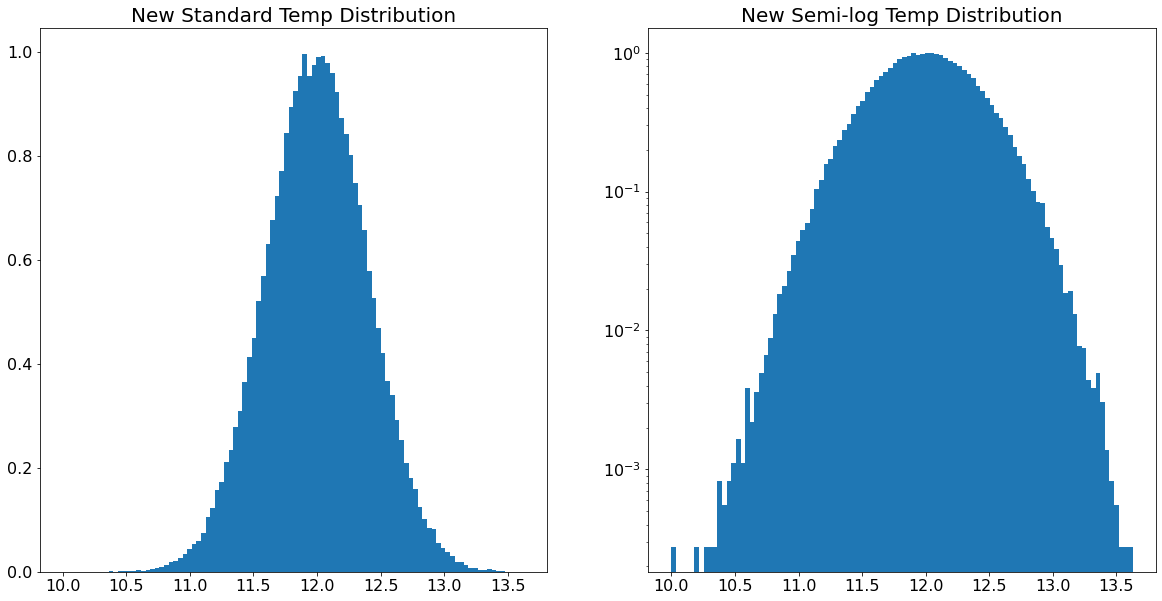

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))

ax[0].hist(data_good,100, density=True)
ax[0].tick_params(labelsize = 16)
ax[0].set_title('New Standard Temp Distribution', size = 20)

ax[1].hist(data_good,100, density=True)
ax[1].tick_params(labelsize = 16)
ax[1].set_yscale('log')
ax[1].set_title('New Semi-log Temp Distribution', size = 20)

In [14]:
my_test_good = len(data_good)
my_test_bad = len(data)-len(data_good)

true_good = 100000
true_bad = len(outliers)

In [15]:
result_data = {'True T':[my_test_good, my_test_bad],
        'Bad T':[true_bad, true_good]}
 
result_df = pd.DataFrame(result_data, index =['My Test Good',
                                'My Test Bad'])

In [16]:
result_df

,True T,Bad T
My Test Good,100003,8
My Test Bad,5,100000


### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

The number of omissions will increase as we decrease the $\sigma$ threshold. Due to the random nature of the outliers, I do not believe it is a predictable quantity, but knowing the exact distribution excluding the outliers would make it possible to make a prediction about how many omissions we will make.

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Not all "bad data" will necissarily fall outside of the threshold we set or even fall outside the standard distribution. For example, it is still possible to get a false temperature measurement that lies within the precision of the thermometer, so this value will not be excluded through any statistical test. In addition, how strictly we restrict our threshold for good vs. bad data will determine the number of omissions, so there will always be some bad data points. The only way to eliminate as much bad data as possible from getting in is to tune the threshold of omission very accurately to the distribution or to be willing to eliminate some of the good data. It depends on how statistically significant the bad data is. 

## Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

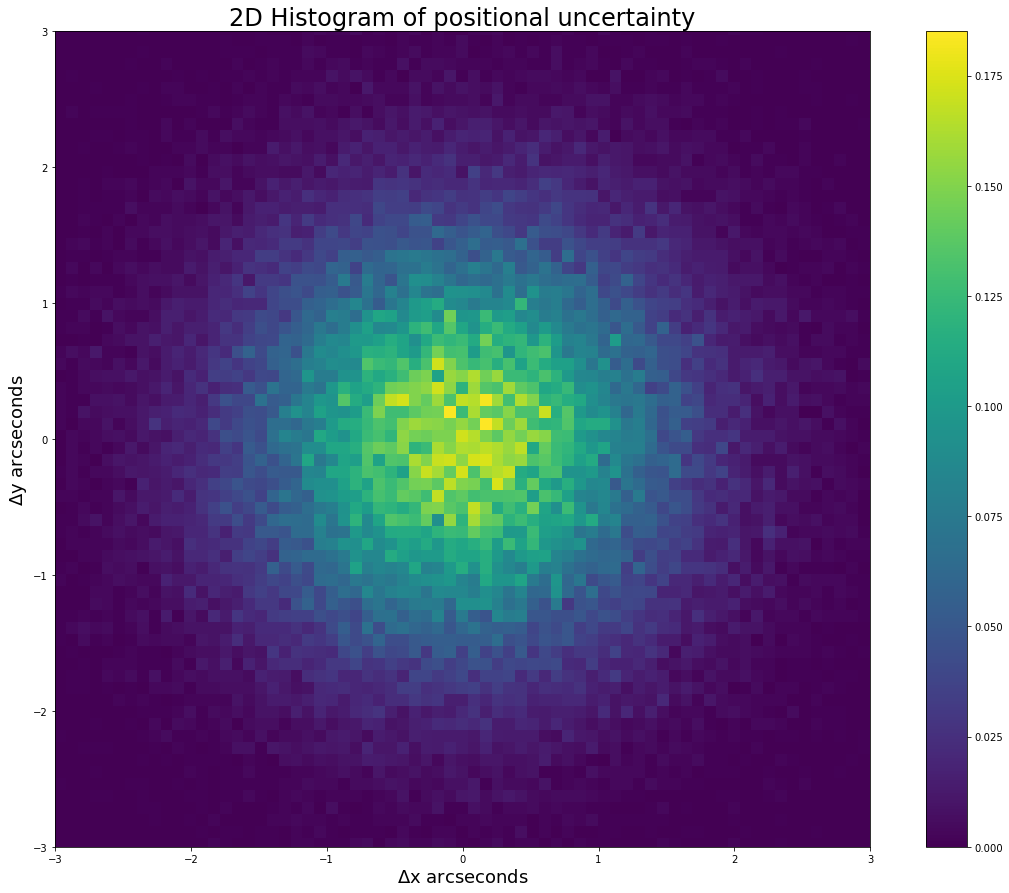

In [17]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1, figsize = (20,15))
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

### 1. What is the question in words?

What is the probability that the above distribution showing the motion of stars in the sky due to atmospheric and instrumental effects will produce a value of velocity that corresponds to a $5\sigma$ measurement or greater?

### 2. What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]

From Wikipedia: $R\sim \mathrm {Rayleigh} (\sigma )$ is Rayleigh distributed if $R={\sqrt {X^{2}+Y^{2}}}$, where $X\sim N(0,\sigma ^{2})$ and $Y\sim N(0,\sigma ^{2})$ are independent normal random variables.

So, whe can reduce this probelem to a Rayleigh distribution with scale factor of 1 as the variance of each gaussian above is 1.

The question then becomes: what distance value produced on a Rayleigh distribution will correspond with a 5$\sigma$ measurement?

In math:

### $\int_{\infty}^{a} {\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})}= 3.5 \times 10^{-6}$,

where we must solve for a.

### 3. What distance in arcseconds represents a 5 sigma detection of motion?

In [18]:
x_r = np.arange(0,10, 0.01)
rayleigh = stats.rayleigh.pdf(x_r, scale = 1)

(0.0, 5.0)

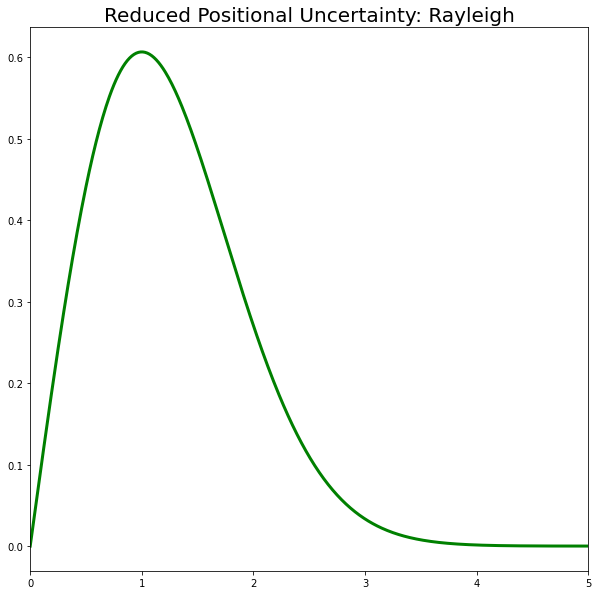

In [19]:
plt.figure(figsize = (10,10))
plt.plot(x_r, rayleigh, linewidth = 3, color = 'green')
plt.title('Reduced Positional Uncertainty: Rayleigh', size = 20)
plt.xlim(0,5)

In [20]:
min_dist = stats.rayleigh.isf(3*10**(-7), loc=0, scale=1)

In [21]:
print(f'For a 5\u03C3 detection of movement, the asteroid must be move a distance of at least {min_dist:.2f} arcsec.')

For a 5σ detection of movement, the asteroid must be move a distance of at least 5.48 arcsec.


## Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

As always:

1. What is the question in words?
2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.
3. Convert to sigma.

There are some unique aspects to this problem. Make sure you explore them in your explanation.

#### 1.

For a standard patch of sky the size of the moon, we should see 7200 cosmic rays for 15 days of observation with 8 hour observing windows. Therefore, by observing near the moon, we see a reduction in the cosmic ray background by about 5.56%. 

This question is also quite different than the previous questions we have in class, so my plan to approach this question is to look for a "lack" of signal, since we want to know the significance of the moon and not some signal above our background. My statistical question is as follows:

Given a Poisson distributed cosmic ray background with a scale factor of 7200, what is the probability that the background will produce a value of 6800 or less?

#### 2.

For Poisson distributions with large expect large values of $\lambda$ ($\lambda > 1000$) we can approximate to a normal distribution with $\mu = \lambda$, $\sigma^2 = \lambda$ so I am going to approximate the cosmic ray background as a Gaussian with a mean of 7200 and standard deviation of $\sqrt{7200}$.

Then, to determine the significance of the moon, I will simply integrate the Gaussian from negative infinity to 6800 to determine the significance of the moon.

In [115]:
x = np.arange(0,14400,0.1)
mean = 7200
std = np.sqrt(7200)
pdf = stats.norm.pdf(x, loc = mean, scale = std)

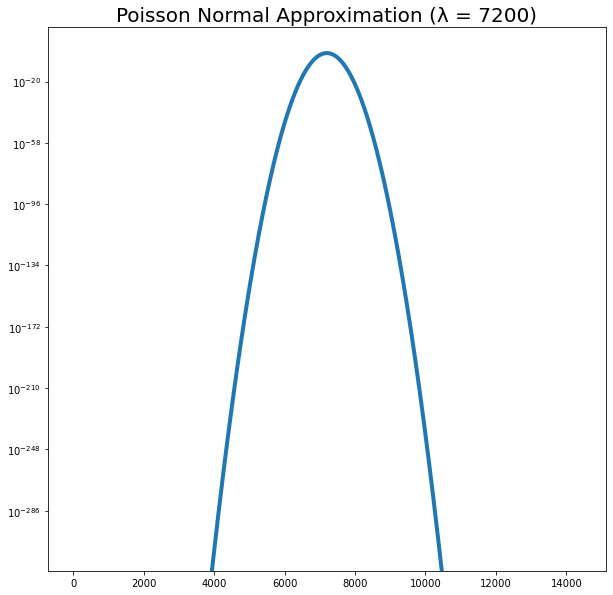

In [116]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, pdf, linewidth = 4)
ax.set_yscale('log')
ax.set_title('Poisson Normal Approximation (\u03BB = 7200)', size = 20);
#ax.set_xlim(4200,10400)

#### 3.

In [117]:
moon_sig = -stats.norm.ppf(stats.norm.cdf(6800, loc=mean, scale=std))

In [118]:
print(f'The significance of the moon {moon_sig:.2f}

4.714045207910317

In [119]:
np.sqrt(7200)

84.8528137423857